### **CNN (Convolutional Neural Network), 합성곱 신경망**
- 실제 이미지 데이터는 분류 대상이 이미지에서 고정된 위치에 있지 않은 경우가 대부분이다.
- 실제 이미지 데이터를 분류하기 위해서는, 이미지의 각 feature들을 그대로 학습하는 것이 아닌, CNN으로 패턴을 인식한 뒤 학습해야 한다.

<div style="display: flex; width:70%; margin-bottom: 30px;">
    <div>
        <img src="./images/dogs01.png" width="500" style="margin-left: 20px">
    </div>
    <div>
        <img src="./images/dogs02.png" width="720" style="margin-left: 80px">
    </div>
</div>

- 이미지의 크기가 커질 수록 굉장히 많은 Weight가 필요하기 때문에 분류기에 바로 넣지 않고, 이를 사전에 추출 및 축소해야 한다.
- CNN은 인간의 시신경 구조를 모방한 기술로서, 이미지의 패턴을 찾을 때 사용한다.
- Feature Extraction을 통해 각 단계를 거치면서, 함축된 이미지 조각으로 분리되고 각 이미지 조각을 통해 이미지의 패턴을 인식한다.

<img src="./images/cnn01.png" width="700" style="margin-left: 0px; margin-bottom: 20px">

- CNN은 분류하기에 적합한 최적의 feature를 추출하고, 최적의 feature를 추출하기 위한 최적의 Weight와 Filter를 계산한다.

<img src="./images/cnn02.png" width="500" style="margin-left: 0px; margin-bottom: 20px;">

#### Filter
- 보통 정방 행렬로 구성되어 있고, 원본 이미지에 슬라이딩 윈도우 알고리즘을 사용하여 순차적으로 새로운 픽셀값을 만들면서 적용한다.
- 사용자가 목적에 맞는 특정 필터를 만들거나 기존에 설계된 다양한 필터를 선택하여 이미지에 적용한다.  
  하지만, CNN은 최적의 필드값을 학습하여 스스로 최적화한다.

<img src="./images/filter.gif" width="400" style="margin-left: 0px; margin-top: -30px; margin-bottom: -50px">
<img src="./images/filter.png" width="500" style="margin-left: 0;">

- 필터 하나 당, 이미지의 채널 수 만큼 Kernel이 존재하고, 각 채널에 할당된 필터의 커널을 적용하여 출력 이미지를 생성한다.
- 출력 feature map의 개수는 필터의 개수와 동일하다.

<img src="./images/filter_channel.gif" width="500">

#### Kernel
- filter 안에 1 ~ n 개의 커널이 존재한다. 커널의 개수는 반드시 이미지의 채널 수와 동일해야 한다.
- Kernel Size는 가로 X 세로를 의미하며, 가로와 세로는 서로 다를 수 있지만 보통은 일치시킨다.
- Kernel Size가 크면 클 수록 입력 이미지에서 더 많은 feature 정보를 가져올 수 있지만,  
  큰 사이즈의 Kernel로 Convolution Backbone을 할 경우 훨씬 더 많은 연산량과 파라미터가 필요하다.

<img src="./images/kernel.gif" width="500" >

#### Stride
- 입력 이미지에 Convolution Filter를 적용할 때 Sliding Window가 이동하는 간격을 의미한다.
- 기본 stride는 1이지만, 2를 적용하면 입력 feature map 대비 출력 feature map의 크기가 절반정도 줄어든다.
- stride를 키우면 featrure 정보를 손실할 가능성이 높아지지만, 오히려 불필요한 특성을 제거하는 효과를 가져올 수 있고 Convolution 연산 속도를 향상시킨다.

<div style="display: flex; width:70%; margin-top: 10px;">
    <div>
        <img src="./images/stride01.gif" width="600" style="margin-left: 0; margin-top: 0">
    </div>
    <div>
        <img src="./images/stride02.gif" width="600" style="margin-left: 50px">
    </div>
</div>

#### Padding
- Filter를 적용하여 Convolution 수행 시 출력 feature map이 입력 feature map 대비 계속해서 작아지는 것을 막기 위해 사용한다.
- Filter 적용 전, 입력 feature map의 상하좌우 끝에 각각 열과 행을 추가한 뒤, 0으로 채워서 크기를 증가시킨다.
- 출력 이미지의 크기를 입력 이미지의 크기와 동일하게 유지하기 위해서 직접 계산할 필요 없이 "same"이라는 값을 통해 입력 이미지의 크기와 동일하게 맞출 수 있다.

<img src="./images/padding.gif" width="600" style="margin-left: 0">

#### Pooling
- Convolution이 적용된 feature map의 일정 영역별로 하나의 값을 추출하여 feature map의 사이즈를 줄인다.
- 보통은 Convolution -> Relu activation -> Pooling 순서로 적용한다.
- 비슷한 feature들이 서로 다른 이미지에서 위치가 달라지면서 다르게 해석되는 현상을 중화시킬 수 있고,  
  feature map의 크기가 줄어들기 때문에, 연산 성능이 향상된다.
- Max Pooling과 Average Pooling이 있으며, Max Pooling은 중요도가 가장 높은 feature를 추출하고, Average Pooling은 전체를 버무려서 추출한다.

<img src="./images/pooling.gif" width="450" style="margin-top: 20px; margin-bottom: 30px">


#### 🚩정리
- Stride를 증가시키는 것과 Pooling을 적용하는 것은 출력 feature map의 크기를 줄이는 데 사용하는 것이다.
- Convolution 연산을 진행하면서, feature map의 크기를 줄이면, 위치 변화에 따른 feature의 영향도도 줄어들기 때문에 과적합을 방지할 수 있는 장점이 있다.
- Pooling의 경우 특정 위치의 feature값이 손실되는 이슈 등으로 인하여 최근 Advanced CNN 에서는 많이 사용되지 않는다.
- Classifier에서는 Fully Connected Layer의 지나친 연결로 인해 많은 파라미터가 생성되므로 오히려 과적합이 발생할 수 있다.
<img src="./images/cnn03.png" width="850">

- Dropout을 사용해서 Layer간 연결을 줄일 수 있으며 과적합을 방지할 수 있다.

In [1]:
# 필터의 갯수가 아웃풋의 개수 ex) 3 x 32 x 32 (w x h x d) 에 5개의 필터를 곱하면 5개
# 필터 안에 커널
# 커널은 커널만의 사이즈가 있는데 필터의 개수에 따라 크기가 달라진다
# 필터의 수는 항상 채널과 동일해야한다 (사이즈는 상관없음)

In [2]:
# pooling 보다는 stride가 더 좋다
# Max pooling 과 average polling 중은 max가 더 적절한 경우가 많다.
# weight 값의 중요도에 따라 풀링을 사용한다

In [3]:
# Dropout 뉴런을 비활성화 시킨다 파라미터값을 줘서 0.5 는 50

In [4]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model

INPUT_SIZE = 28

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))

# padding 을 same 을 주면 사이즈 유지 (줄어들지 않음)
x = Conv2D(filters=4, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
print(x)

<KerasTensor shape=(None, 28, 28, 4), dtype=float32, sparse=False, name=keras_tensor_1>


In [5]:
# (1, 28, 28, 3)
# 개수(배치사이즈), 사이즈, 사이즈, 채널

# (28, 28, 1)
# 사이즈, 사이즈, 채널이자 갯수

In [6]:
INPUT_SIZE = 32

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))
x = Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = MaxPooling2D(2)(x)
print(x)

<KerasTensor shape=(None, 16, 16, 16), dtype=float32, sparse=False, name=keras_tensor_4>


In [7]:
INPUT_SIZE = 32

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))

# input = 1
# kernel = 3 *3 = 9
# filter = 32
# 288 + 32 = 320 = 파라미터 수
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)

# input = 32
# kernel = 3 *3 = 9
# filter = 64
# 18432 + 64 = 18496
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)

# MaxPooling은 최대값 추출하는 작업으로 파라미터 값을 생성하지 않는다.
x =  MaxPooling2D(2)(x)

model = Model(inputs=input_tensor, outputs=x)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,816 (73.50 KB)

 Trainable params: 18,816 (73.50 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 실 습
# ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
# ┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
# ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
# │ input_layer_12 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
# ├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
# │ conv2d_22 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
# ├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
# │ conv2d_23 (Conv2D)                   │ (None, 26, 26, 64)          │          18,496 │
# ├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
# │ max_pooling2d_11 (MaxPooling2D)      │ (None, 13, 13, 64)          │               0 │
# ├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
# │ flatten_9 (Flatten)                  │ (None, 10816)               │               0 │
# ├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
# │ dense_18 (Dense)                     │ (None, 50)                  │         540,850 │
# ├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
# │ dense_19 (Dense)                     │ (None, 10)                  │             510 │
# └──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

In [9]:
from tensorflow.keras.layers import Flatten, Dense

INPUT_SIZE = 28
input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))

x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
print(x)

<KerasTensor shape=(None, 28, 28, 32), dtype=float32, sparse=False, name=keras_tensor_10>


In [10]:
x = Conv2D(filters=64, kernel_size=3, strides=1, activation='relu')(x)
print(x)

<KerasTensor shape=(None, 26, 26, 64), dtype=float32, sparse=False, name=keras_tensor_11>


In [11]:
x =  MaxPooling2D(2)(x)
print(x)

<KerasTensor shape=(None, 13, 13, 64), dtype=float32, sparse=False, name=keras_tensor_12>


In [12]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

x = Flatten()(x)
x = Dense(50, activation ='relu')(x)
output = Dense(10, activation = 'softmax')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │         540,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 560,176 (2.14 MB)

 Trainable params: 560,176 (2.14 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

def get_preprocessed_ohe(images, targets):
    images, targets = get_preprocessed_data(images, targets)
    oh_targets = to_categorical(targets)

    return images, oh_targets

def get_train_valid_test(train_images, train_targets, test_images, test_targets, validation_size=0.2, random_state=124):
    train_images, train_oh_targets = get_preprocessed_ohe(train_images, train_targets)
    test_images, test_oh_targets = get_preprocessed_ohe(test_images, test_targets)

    train_images, validation_images, train_oh_targets, validation_oh_targets = \
    train_test_split(train_images, train_oh_targets, stratify=train_oh_targets, test_size=validation_size, random_state=random_state)

    return (train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets)

In [14]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

(train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets) = \
get_train_valid_test(train_images, train_targets, test_images, test_targets)

print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)
print(test_images.shape, test_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)
(10000, 28, 28) (10000, 10)


In [15]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['acc'])

In [16]:
history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    batch_size=64, 
                    epochs=20, 
                    validation_data=(validation_images, validation_oh_targets))
# 실제로 할 때에는 epoch를 2정도 줘서 두 사이의 격차를 확인해본 후 판단한다.
# 전처리를 다시 해야할지, 이대로 끝내도 좋을지

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - acc: 0.7790 - loss: 0.6197 - val_acc: 0.8917 - val_loss: 0.3097
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - acc: 0.9009 - loss: 0.2785 - val_acc: 0.9096 - val_loss: 0.2520
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - acc: 0.9229 - loss: 0.2170 - val_acc: 0.9146 - val_loss: 0.2357
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - acc: 0.9337 - loss: 0.1824 - val_acc: 0.9204 - val_loss: 0.2225
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - acc: 0.9466 - loss: 0.1467 - val_acc: 0.9201 - val_loss: 0.2293
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - acc: 0.9565 - loss: 0.1200 - val_acc: 0.9212 - val_loss: 0.2423
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - acc: 0.9634 - loss: 0.0969 - val_acc: 0.9213 - val_loss: 0.2502
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - acc: 0.9726 - loss: 0.0747 - val_acc: 0.9247 - val_loss: 0.2728
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 

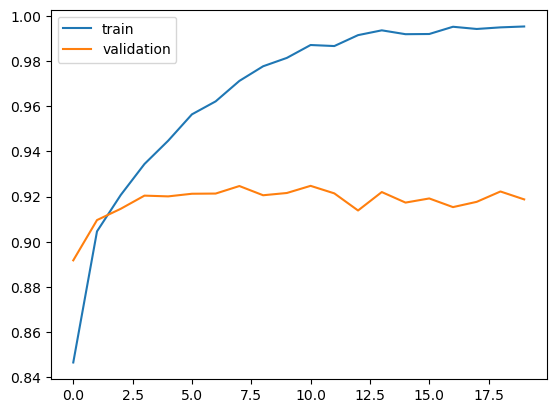

In [17]:
import matplotlib.pyplot as plt
# 그래프로 확인하기
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()
plt.show()

In [18]:
# 테스트 데이터 세트로 모델 성능 검증하기
model.evaluate(test_images, test_oh_targets)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9142 - loss: 0.5909


[0.5858524441719055, 0.9135000109672546]

In [19]:
# 과적합이라 판단되는 경우 과적합을 해소하는 방법
# 과적합이 왜 생길까? 파람 수가 너무 많아서
# Dropout 을 넣어준다 (과적합 방지)
# 언제 넣어야할까? 파람 수가 가장 많이 생성되기 전 잘라준다

In [20]:
from tensorflow.keras.layers import Flatten, Dense, Dropout

INPUT_SIZE = 28

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))

x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)

x = MaxPooling2D(2)(x)

x = Flatten()(x)

# Dense 하면서 파람이 증가하기 시작하기 때문에 보통 Flatten 한 다음 Dense 전에 Dropout 해준다.
# rate 를 주는 값에 따라 얼만큼 비활성화 될지 정해진다.
x = Dropout(rate=0.5)(x)
x = Dense(50, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 26, 26, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │         540,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 560,176 (2.14 MB)

 Trainable params: 560,176 (2.14 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['acc'])

In [22]:
history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    batch_size=64, 
                    epochs=20, 
                    validation_data=(validation_images, validation_oh_targets))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - acc: 0.7780 - loss: 0.6182 - val_acc: 0.8917 - val_loss: 0.3065
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - acc: 0.8871 - loss: 0.3110 - val_acc: 0.9020 - val_loss: 0.2724
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - acc: 0.9037 - loss: 0.2600 - val_acc: 0.9115 - val_loss: 0.2376
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - acc: 0.9187 - loss: 0.2216 - val_acc: 0.9165 - val_loss: 0.2245
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - acc: 0.9282 - loss: 0.1964 - val_acc: 0.9173 - val_loss: 0.2199
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - acc: 0.9322 - loss: 0.1778 - val_acc: 0.9189 - val_loss: 0.2175
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - acc: 0.9383 - loss: 0.1635 - val_acc: 0.9242 - val_loss: 0.2109
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - acc: 0.9437 - loss: 0.1489 - val_acc: 0.9273 - val_loss: 0.2168
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 

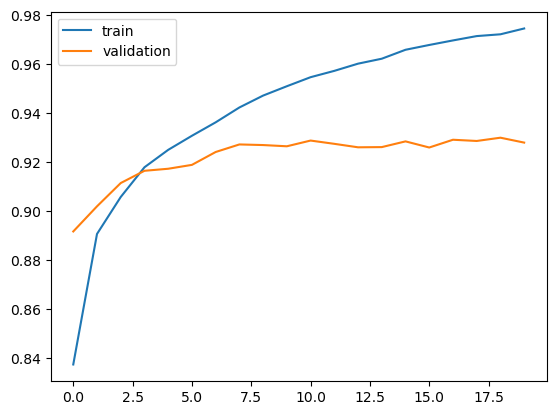

In [23]:
import matplotlib.pyplot as plt
# 그래프로 확인하기
def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

In [24]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_images, test_oh_targets, batch_size=256, verbose=1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.9232 - loss: 0.2875


[0.2835415303707123, 0.9243999719619751]